# Taxi Service Insights: Unveiling Ride Patterns, Demand Hotspots, and Weather Effects

## Introduction

This project involves an explorative analysis of taxi ride data with the aim of exploring various aspects of the taxi service patterns of top comapnies and locations. 
To begin with, we analyzed the dataset to identify the top 10 neighborhoods with the highest number of dropoffs. This analysis provides an understanding of the demand and popularity of taxi services in different areas of the city. By graphing the data, we can easily identify the neighborhoods that generate the most demand for taxi rides.

We begin by preprocessing the data, ensuring its quality and relevance to our analysis, and will also analyze taxi ride data and test a hypothesis regarding the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays compared to other Saturdays. The analysis aims to uncover whether there is a statistically significant difference in ride durations based on weather conditions. To achieve this, we have collected a dataset containing information about taxi rides, including the pickup date and time, weather conditions, and duration of the rides. By examining these datasets, we can explore the relationship between weather conditions and ride durations and determine if rainy Saturdays exhibit different ride durations compared to other Saturdays.



## Table Scheme

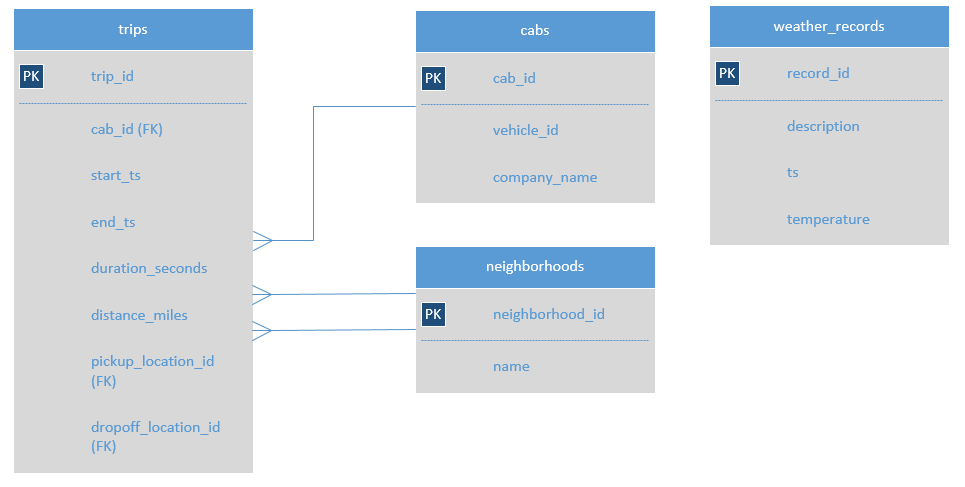

In [1]:
# add table scheme
from IPython.display import Image
Image(filename='Table_scheme.png')

## Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


## Load Data

In [3]:
# Read CSV files into dataframe
result1 = pd.read_csv('datasets/project_sql_result_01.csv')
result4 = pd.read_csv('datasets/project_sql_result_04.csv')

In [4]:
result1.info()
print(result1.head())
result4.info()
print(result4.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
  dropoff_location_name 

Import libraries, and read the CSV data files, show info for data types and preview the dataframes, to look for any issues with the data.

## Data Preprocessing

In [5]:
#Search for duplicates and null values
print(result1.duplicated().sum())
print(result4.duplicated().sum())
duplicate_rows = result1[result1.duplicated()]
print(duplicate_rows)

0
0
Empty DataFrame
Columns: [company_name, trips_amount]
Index: []


Search for duplicates and null values in the data. None were found.

## Top 10 neighborhoods by drop-offs

In [6]:
# Find the top 10 neighborhoods by drop-offs
top_10_locations = result4.groupby('dropoff_location_name')['average_trips'].sum().nlargest(10)
print(top_10_locations)


dropoff_location_name
Loop                  10727.466667
River North            9523.666667
Streeterville          6664.666667
West Loop              5163.666667
O'Hare                 2546.900000
Lake View              2420.966667
Grant Park             2068.533333
Museum Campus          1510.000000
Gold Coast             1364.233333
Sheffield & DePaul     1259.766667
Name: average_trips, dtype: float64


Taking the merged dataframe, and grouping the data by dropoff location name, while summing up the trips amount. Then using the nlargest function to find the top 10 locations with the highest number of dropoffs. The top 10 locations are as follows: Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul.

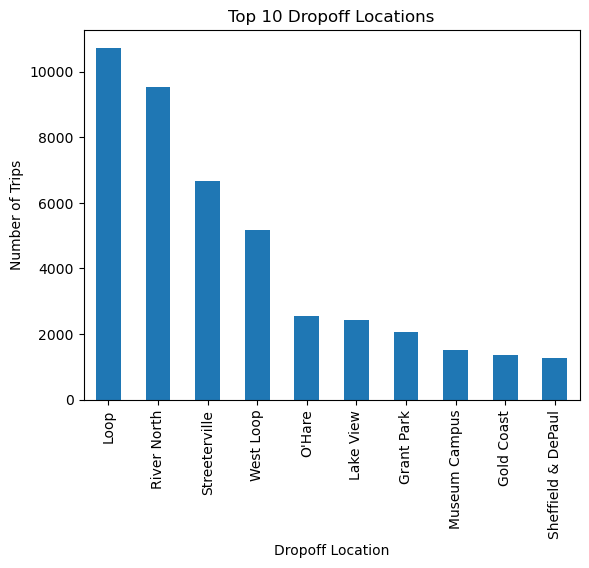

In [7]:
# Graph the top 10 dropoff locations by number of trips
top_10_locations.plot(kind='bar', title='Top 10 Dropoff Locations')
plt.xlabel('Dropoff Location')
plt.ylabel('Number of Trips')
plt.show()

This graph displays the top 10 neighborhoods by the number of drop-offs, Loop is the neighborhood with the highest number of drop-offs. It stands out significantly compared to other neighborhoods in terms of ride demand. River North and Streeterville are the next two neighborhoods with a relatively high number of drop-offs, but their numbers are lower than that of Loop. O'Hare, the location near the O'Hare International Airport, also has a notable number of drop-offs, likely due to passenger arrivals and departures.

These conclusions suggest that certain taxi companies and neighborhoods have a more significant presence and higher ride demand. The insights can be valuable for taxi companies to focus their operations and marketing strategies in areas with higher ride demand.

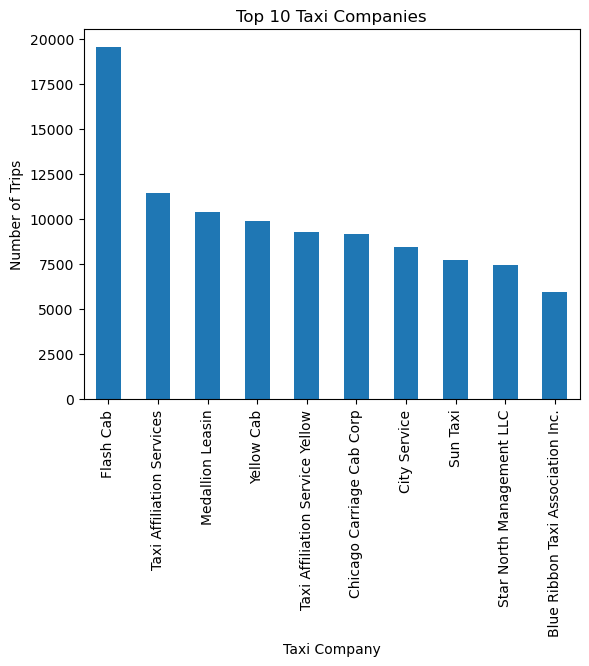

In [8]:
# Graph for taxi companies and number of rides
top_10_taxi = result1.groupby('company_name')['trips_amount'].sum().nlargest(10)
top_10_taxi.plot(kind='bar', title='Top 10 Taxi Companies')
plt.xlabel('Taxi Company')
plt.ylabel('Number of Trips')
plt.show()

Based on this graph, which shows the number of rides by taxi companies, Flash Cab and Taxi Affiliation Services are the two taxi companies with the highest number of rides. They have a significant lead over other companies in terms of ride volume. Medallion Leasin, Yellow Cab, and Taxi Affiliation Service Yellow also have a considerable number of rides, although lower compared to the top two companies. There is a noticeable variation in the number of rides among different taxi companies, indicating that the market is not evenly distributed, and certain companies dominate the business.

## Add Dataset

In [9]:
# Adding the next Dataframe from the CSV file
result7 =pd.read_csv('datasets/project_sql_result_07.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/project_sql_result_07.csv'

In [ ]:
result7.info()
print(result7.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
5  2017-11-11 04:00:00               Good            1320.0
6  2017-11-04 16:00:00                Bad            2969.0
7  2017-11-18 11:00:00               Good            2280.0
8  2017-11-11 14:00:00               Good            246

## Data Preprocessing

In [ ]:
# Convert to datetime
result7['start_ts'] = pd.to_datetime(result7['start_ts'])
result7.info()
print(result7.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0
5 2017-11-11 04:00:00               Good            1320.0
6 2017-11-04 16:00:00                Bad            2969.0
7 2017-11-18 11:00:00               Good            2280.0
8 2017-11-1

## Hypothesis Testing

**Null hypothesis (H0):** The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays.

**Alternative hypothesis (H1):** The average duration of rides from the Loop to O'Hare International Airport is different on rainy Saturdays.

Alpha value is 0.05, which corresponds to a 5% significance level, as it is a commonly used value. A two-sample t-test will be used.

In [ ]:
result7['day_of_week'] = pd.to_datetime(result7['start_ts']).dt.dayofweek

saturday_rides = result7[result7['day_of_week'] == 5]

good_saturdays = saturday_rides[saturday_rides['weather_conditions'] == 'Good']
rainy_saturdays = saturday_rides[saturday_rides['weather_conditions'] != 'Good']

avg_duration_good = good_saturdays['duration_seconds'].mean()
avg_duration_rainy = rainy_saturdays['duration_seconds'].mean()

t_statistic, p_value = stats.ttest_ind(
    rainy_saturdays['duration_seconds'], good_saturdays['duration_seconds'])


print("Average duration in minutes of rides on good weather Saturdays:", avg_duration_good/60)
print("Average duration in minutes of rides on rainy weather Saturdays:", avg_duration_rainy/60)
print("t-statistic:", t_statistic)
print("p-value:", p_value)



Average duration in minutes of rides on good weather Saturdays: 33.327927927927924
Average duration in minutes of rides on rainy weather Saturdays: 40.45342592592593
t-statistic: 6.946177714041499
p-value: 6.517970327099473e-12


Filtering the rides from the Loop to O'Hare International Airport, and extracting the start_ts, to only include Saturdays. Then creating two conditions of either Rain, or no Rain, noted as "Good" or "Bad". The average of both conditions is calcuted and shown as minutes to see that the duration of rides is longer for rainy days. The two-sample t-test is used to obtain the t-statistics and p-value for our hypothesis testing.

In [ ]:
t_stat, p_value = stats.ttest_ind(
    rainy_saturdays['duration_seconds'], good_saturdays['duration_seconds'])

alpha = 0.05

if p_value < alpha:
     print("Reject the null hypothesis. There is a statistically significant difference in average ride durations on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in average ride durations on rainy Saturdays.")

Reject the null hypothesis. There is a statistically significant difference in average ride durations on rainy Saturdays.


The t-test is appropriate for comparing the means of two independent samples. In this case, the two groups: rainy Saturdays and good weather Saturdays are independent of each other. The t-test is also appropriate because the data is normally distributed. After running this test, we find that the p-value is less than our alpha of 0.05. Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference in average ride durations on rainy days.

## Conclusion

We imported the data and searched for inconsistences and null values. We found that there were no duplicates or null values. We then merged the dataframes and created graphs to show the top 10 dropoff locations and taxi companies. 

The top 10 companies were Flash Cab, Taxi Affiliation Services, Yellow Cab, Medallion Leasing, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC, and Blue Ribbon Taxi Association Inc.

The top 10 dropoff locations were Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul.

We then imported the next dataframe and converted the start_ts column to datetime. Then created a new column for the day of the week as well as a new dataframe for Saturdays with the weather conditions. After calculating the average duration of rides on good, or rainy weather Saturdays, we then calculated the t-statistic and p-value. Testing the hypothesis with a calculated t-statistic and p-value, we then compared the p-value to the alpha value, which determined to reject the null hypothesis. We concluded that there is statistically significant difference in average ride durations on rainy Saturdays.